In [4]:
import bk.load
import bk.plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def gather(base_folder,local_path,*args,**kwargs):
    bk.load.current_session_linux(base_folder,local_path)
    _,metadata = bk.load.spikes()
    data = bk.load.analysis(args[0])

    f = np.mean(data[2],0)

    # structures = ['Hpc','BLA','CeCM','LaDL']
    # col = ['b','g','r','k']
    # fig,ax = plt.subplots(1,1,dpi = 200)
    # for s,c in zip(structures,col):
    #     bk.plot.confidence_intervals(f,data[0][1][:,metadata.Region == s].T,c,ax)
    # plt.legend(structures)
    # plt.title(bk.load.session)
    # plt.xlabel('Freqs(Hz)')
    # plt.ylabel('MRL')

    return f,data[0][1].T,metadata

def merge(batch):
    modfreq = []
    metadata = pd.DataFrame()
    for i,b in batch.items():
        if b is False:
            continue
        f = b[0]
        modfreq.append(b[1])
        metadata = pd.concat((metadata,b[2]))

    return f,np.vstack(modfreq),metadata

In [6]:
names = ['NREM','REM']
arguments = [['freq_mod/freq_mod_local_200um_3_200_100_NREM.npy'],
             ['freq_mod/freq_mod_local_200um_3_200_100.npy']]

batch = {}
metadata = {}
for name,args in zip(names,arguments):
    batch_, metadata_ = bk.load.batch(
        gather, local_base='/mnt/electrophy/Gabrielle/GG-Dataset-Light/', *args)
    batch.update({name:batch_})
    metadata.update({name:metadata_})


100%|██████████| 61/61 [01:39<00:00,  1.63s/it]

Batch finished in 99.17801594734192
Some session were not processed correctly
['Rat08-20130712', 'Rat08-20130718', 'Rat08-20130719', 'Rat08-20130720', 'Rat08-20130722', 'Rat09-20140324', 'Rat09-20140325', 'Rat09-20140326', 'Rat09-20140327', 'Rat09-20140328', 'Rat09-20140329', 'Rat09-20140331', 'Rat09-20140401', 'Rat09-20140402', 'Rat09-20140403', 'Rat09-20140404', 'Rat09-20140405', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat11-20150316', 'Rat11-20150402', 'Rat11-20150403']
37.704918032786885 %


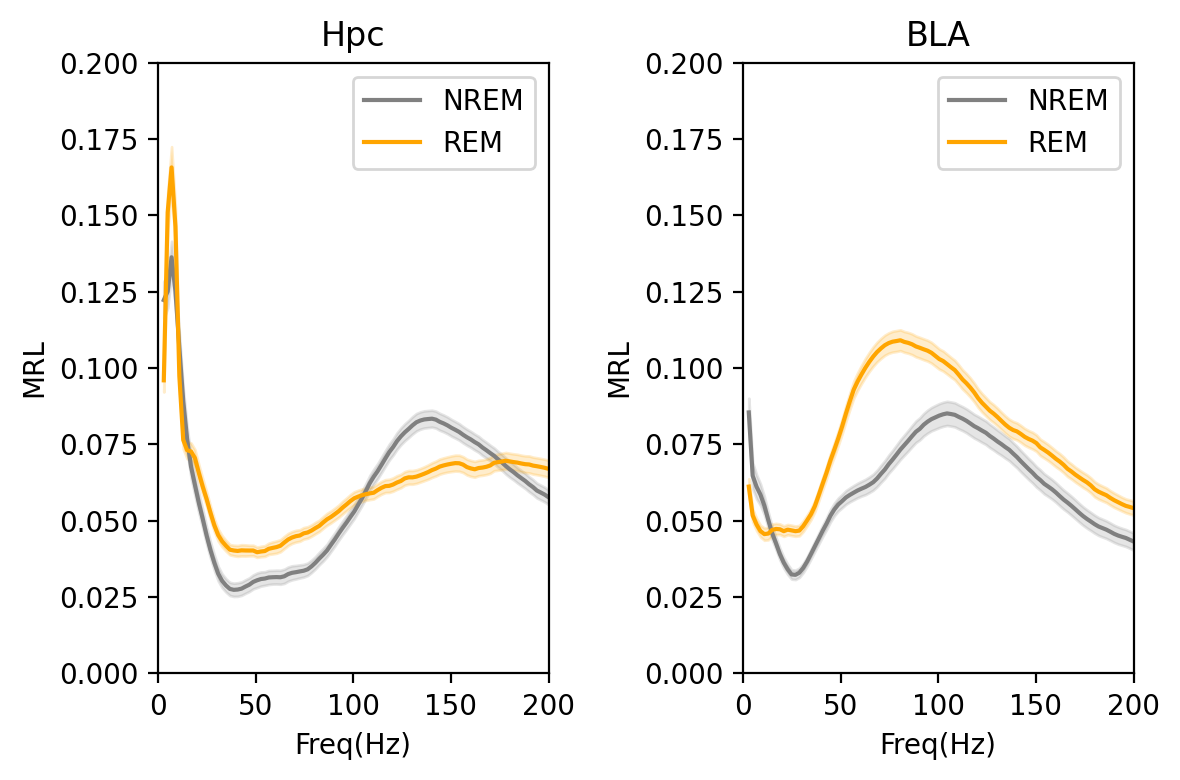

In [42]:
states = ['NREM','REM']
colors = ['grey','orange']
region = ['Hpc','BLA']
fig,axes = plt.subplots(1,len(region),dpi = 200)
for stru,ax in zip(region,axes):
    for color,state in zip(colors,states):
        f, mod, metadata = merge(batch[state])
        bk.plot.confidence_intervals(f, mod[metadata.Region == stru],color,ax)
    ax.set_title(stru)
    ax.set_xlabel('Freq(Hz)')
    ax.set_ylabel('MRL')


    ax.set_ylim(0,0.2)
    ax.set_xlim(0,200)
    ax.legend(states)
plt.tight_layout()

(0.0, 0.2)

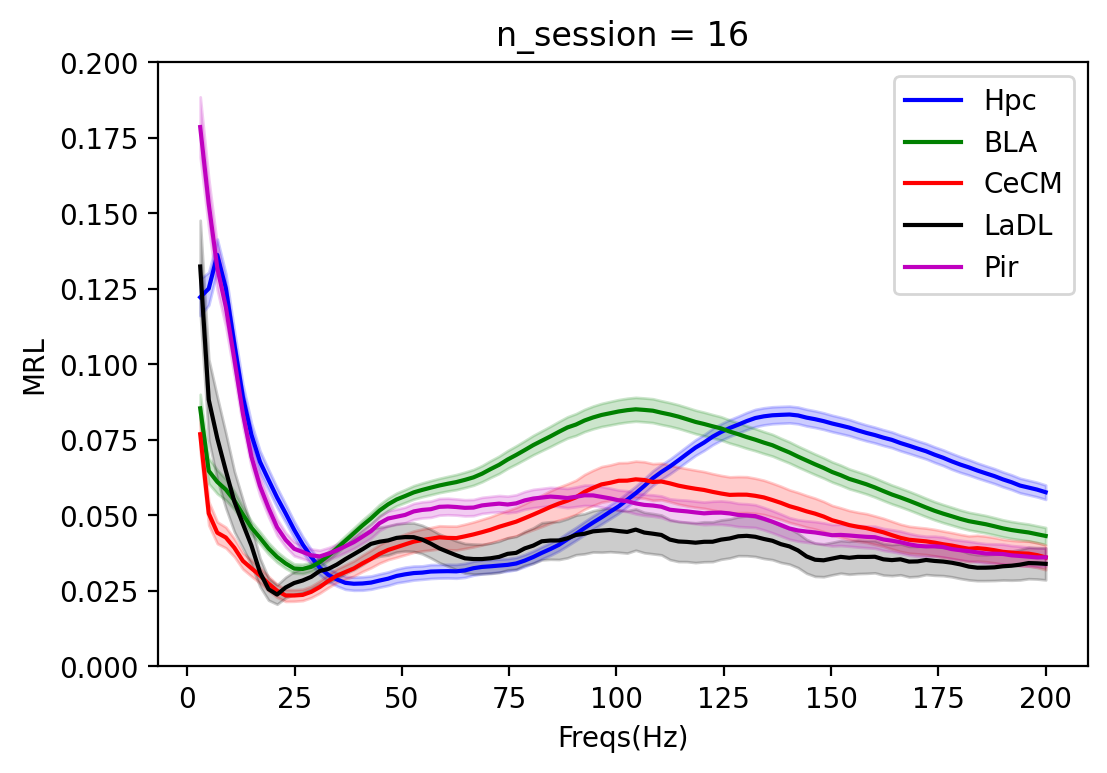

In [14]:
f, mod, metadata = merge(batch['NREM'])
n_sess = len(batch['NREM'])



structures = ['Hpc', 'BLA', 'CeCM', 'LaDL', 'Pir']
col = ['b', 'g', 'r', 'k', 'm']
fig, ax = plt.subplots(1, 1, dpi=200)
for s, c in zip(structures, col):
    bk.plot.confidence_intervals(f, mod[metadata.Region == s], c, ax)
plt.legend(structures)
plt.title(f'n_session = {n_sess}')
plt.xlabel('Freqs(Hz)')
plt.ylabel('MRL')
plt.ylim(0, 0.2)


(0.0, 0.2)

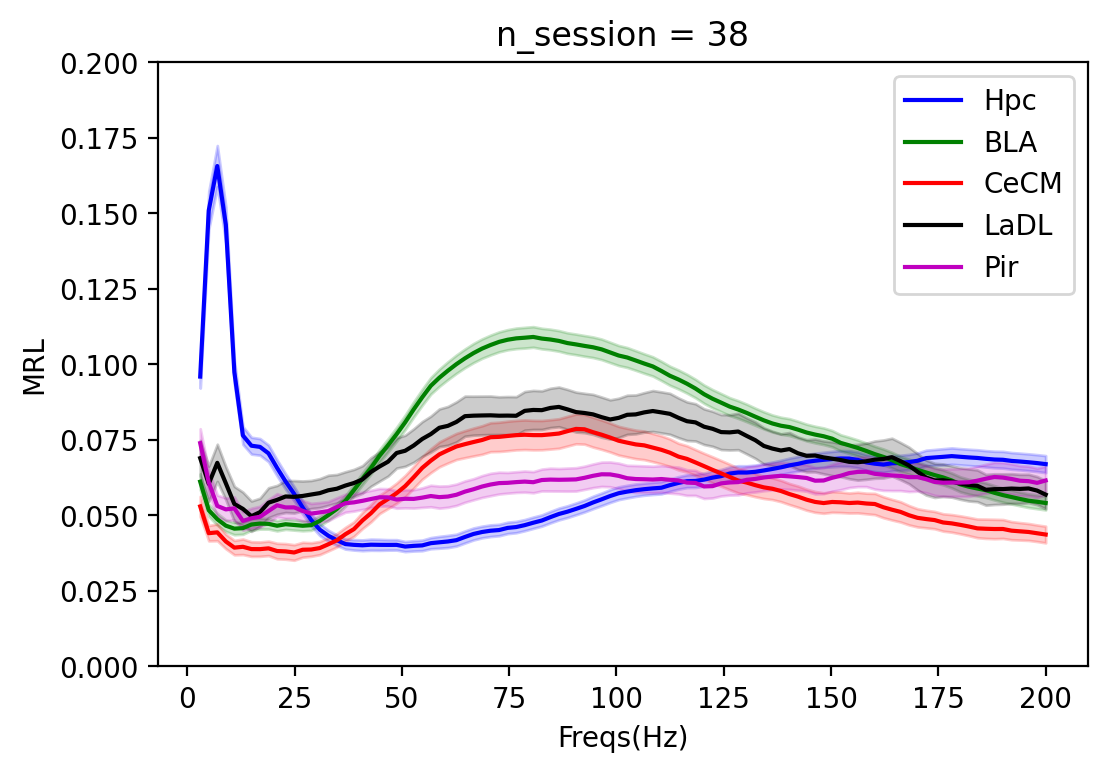

In [5]:
# args = ['freq_mod/freq_mod_local_200um_3_200_100.npy']

# batch,metadata = bk.load.batch(gather,local_base='/mnt/electrophy/Gabrielle/GG-Dataset-Light/',*args)
# f,mod,metadata = merge(batch)


structures = ['Hpc','BLA','CeCM','LaDL','Pir']
col = ['b','g','r','k','m']
fig,ax = plt.subplots(1,1,dpi = 200)
for s,c in zip(structures,col):
    bk.plot.confidence_intervals(f,mod[metadata.Region == s],c,ax)
plt.legend(structures)
plt.title(f'n_session = {len(batch)}')
plt.xlabel('Freqs(Hz)')
plt.ylabel('MRL')

plt.ylim(0,0.2)